In [ ]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.6/677.6 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d duttadebadri/image-classification

Dataset URL: https://www.kaggle.com/datasets/duttadebadri/image-classification
License(s): CC0-1.0


In [ ]:
!unzip -q image-classification.zip -d image-classification

In [ ]:
import os
import mlflow

mlflow_dir = "/content/drive/MyDrive/mlflow_fraud"
os.makedirs(mlflow_dir, exist_ok=True)

mlflow.set_tracking_uri(f"sqlite:///{mlflow_dir}/mlflow.db")
mlflow.set_experiment("image-classification-experiment")

2025/03/24 16:15:40 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/03/24 16:15:40 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

2025/03/25 10:41:59 INFO mlflow.tracking.fluent: Experiment with name 'image-classification-experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/drive/MyDrive/mlflow_logs2/268340142215647285', creation_time=1742899319324, experiment_id='268340142215647285', last_update_time=1742899319324, lifecycle_stage='active', name='image-classification-experiment', tags={}>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare MLFlow

In [ ]:
import os
import mlflow

mlflow_dir = "/content/drive/MyDrive/mlflow_image_classification"
os.makedirs(mlflow_dir, exist_ok=True)

mlflow.set_tracking_uri(f"file://{mlflow_dir}")
mlflow.set_experiment("image-classification-experiment")


2025/03/27 15:47:21 INFO mlflow.tracking.fluent: Experiment with name 'image-classification-experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/drive/MyDrive/mlflow_image_classification/203112712173911662', creation_time=1743090441726, experiment_id='203112712173911662', last_update_time=1743090441726, lifecycle_stage='active', name='image-classification-experiment', tags={}>

# Loading Data and Splitting data

In [41]:
import tensorflow as tf

In [42]:
batch_size = 2
img_height = 224
img_width = 224

In [43]:
train_path ="image-classification/images/images"
train_dir = pathlib.Path(train_path).with_suffix('')

In [44]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 35093 files belonging to 4 classes.


In [45]:
val_path ="image-classification/validation/validation"
val_dir = pathlib.Path(val_path).with_suffix('')

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 122 files belonging to 4 classes.


In [46]:
class_name = train_ds.class_names
print(class_name)

['architecure', 'art and culture', 'food and d rinks', 'travel and  adventure']


In [47]:
image_batch, label_batch = next(iter(train_ds))

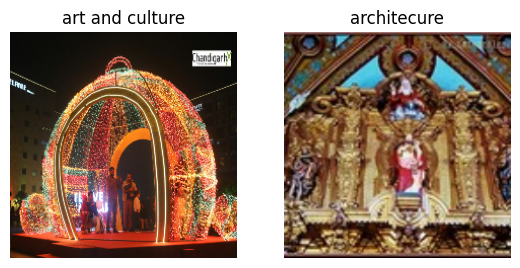

In [48]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for i in range(min(9, len(image_batch))):  # Ensure we don't exceed batch size
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))  # Convert tensor to uint8
    plt.title(class_name[label_batch[i].numpy()])  # Get class name
    plt.axis("off")
plt.show()

In [49]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(2, 224, 224, 3)
(2,)


# Preprocessing Image data

In [50]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [51]:
import numpy as np

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

5.0018025e-05 0.99049616


In [52]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Model Architecture

In [53]:
num_classes = len(class_name)
print(num_classes)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
]
)

4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       5,538,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,546,484 (21.16 MB)

 Trainable params: 5,546,484 (21.16 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)


# Training model

In [56]:
with mlflow.start_run() as run:
  mlflow.set_tag("Machine Learning Engineer", "Mukhammad Fahevi Ali Rafsanjani")

  mlflow.log_param("train-data-path", "image-classification/images/images")
  mlflow.log_param("valid-data-path", "image-classification/validation/validation")
  model.fit(
      train_ds,
      validation_data = val_ds,
      epochs=5,
      callbacks=[mlflow.tensorflow.MlflowCallback()],
    )
  mlflow.tensorflow.log_model(
        model, "model", keras_model_kwargs={"save_format": "h5"}
    )

  # model_save_path = f"{mlflow_dir}/model.h5"
  # model.save(model_save_path)
loaded_model = mlflow.tensorflow.load_model(f"runs:/{run.info.run_id}/model")
print("Model loaded successfully!")

Epoch 1/5
17547/17547 ━━━━━━━━━━━━━━━━━━━━ 127s 7ms/step - accuracy: 0.6711 - loss: 0.8013 - val_accuracy: 0.6475 - val_loss: 1.5545
Epoch 2/5
17547/17547 ━━━━━━━━━━━━━━━━━━━━ 137s 7ms/step - accuracy: 0.9075 - loss: 0.2408 - val_accuracy: 0.7787 - val_loss: 1.4516
Epoch 3/5
17547/17547 ━━━━━━━━━━━━━━━━━━━━ 121s 7ms/step - accuracy: 0.9390 - loss: 0.1680 - val_accuracy: 0.7869 - val_loss: 3.2300
Epoch 4/5
17547/17547 ━━━━━━━━━━━━━━━━━━━━ 121s 7ms/step - accuracy: 0.9598 - loss: 0.1153 - val_accuracy: 0.7705 - val_loss: 3.4011
Epoch 5/5
17547/17547 ━━━━━━━━━━━━━━━━━━━━ 141s 7ms/step - accuracy: 0.9700 - loss: 0.0907 - val_accuracy: 0.7705 - val_loss: 5.3294


2025/03/27 16:45:30 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/03/27 16:45:30 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp6u9gbzz2/model, flavor: tensorflow). Fall back to return ['tensorflow==2.18.0', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/03/27 16:45:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model loaded successfully!


In [ ]:
!pip install pyngrok -q

In [ ]:
import subprocess
from pyngrok import ngrok, conf
import getpass

In [ ]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········


In [57]:
# Expose the MLflow UI on port 5000
port = 5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel "{public_url}" -> "http://127.0.0.1:{port}"')

 * ngrok tunnel "https://25a1-34-16-142-183.ngrok-free.app" -> "http://127.0.0.1:5000"


In [58]:
!mlflow ui --backend-store-uri "/content/drive/MyDrive/mlflow_image_classification" --port 5000 &


[2025-03-27 17:03:13 +0000] [21391] [INFO] Starting gunicorn 23.0.0
[2025-03-27 17:03:13 +0000] [21391] [INFO] Listening at: http://127.0.0.1:5000 (21391)
[2025-03-27 17:03:13 +0000] [21391] [INFO] Using worker: sync
[2025-03-27 17:03:13 +0000] [21392] [INFO] Booting worker with pid: 21392
[2025-03-27 17:03:13 +0000] [21393] [INFO] Booting worker with pid: 21393
[2025-03-27 17:03:13 +0000] [21394] [INFO] Booting worker with pid: 21394
[2025-03-27 17:03:13 +0000] [21395] [INFO] Booting worker with pid: 21395


[2025-03-27 17:16:42 +0000] [21391] [INFO] Handling signal: int
[2025-03-27 17:16:42 +0000] [21392] [INFO] Worker exiting (pid: 21392)
[2025-03-27 17:16:42 +0000] [21394] [INFO] Worker exiting (pid: 21394)
[2025-03-27 17:16:42 +0000] [21393] [INFO] Worker exiting (pid: 21393)
[2025-03-27 17:16:42 +0000] [21395] [INFO] Worker exiting (pid: 21395)
[2025-03-27 17:16:43 +0000] [21391] [INFO] Shutting down: Master


In [ ]:
import shutil

# Define source folder and output zip file path
source_folder = "/content/drive/MyDrive/mlflow_logs"
zip_file = "/content/drive/MyDrive/mlflow_logs_backup.zip"

# Create a zip archive
shutil.make_archive(zip_file.replace(".zip", ""), 'zip', source_folder)

print(f"Zipped folder saved to: {zip_file}")


Zipped folder saved to: /content/drive/MyDrive/mlflow_logs_backup.zip
